# **Dataset goodbooks-10k dari Kaggle**

## **Persiapan dan Import Library**

Library dasar yang dipakai untuk manipulasi data (pandas, numpy), visualisasi (seaborn, matplotlib), dan pengolahan teks (TF-IDF, cosine similarity).



In [201]:
# Install Kaggle API untuk mengunduh dataset dari Kaggle
!pip install kaggle

In [349]:
# === Import Library yang Dibutuhkan ===

# General-purpose libraries
import os
import numpy as np
import pandas as pd

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning & Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TensorFlow / Deep Learning
import tensorflow as tf
from tensorflow import keras
from keras import layers

### Setup Kaggle API

Memasukkan kredensial Kaggle secara langsung di environment agar bisa akses dataset Kaggle.

In [203]:
# Set environment variables untuk Kaggle API
os.environ['KAGGLE_USERNAME'] = "evameivinadwiana"
os.environ['KAGGLE_KEY'] = "efbafcb258eb3a5f3033f21f925e06ef"

### Download dan Ekstrak Dataset

In [204]:
# Download dataset goodbooks-10k dari Kaggle
!kaggle datasets download zygmunt/goodbooks-10k

# Extract file ZIP ke folder ./goodbooks10k (overwrite jika sudah ada)
!unzip -o goodbooks-10k.zip -d ./goodbooks10k

Dataset URL: https://www.kaggle.com/datasets/zygmunt/goodbooks-10k
License(s): CC-BY-SA-4.0
goodbooks-10k.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  goodbooks-10k.zip
  inflating: ./goodbooks10k/book_tags.csv  
  inflating: ./goodbooks10k/books.csv  
  inflating: ./goodbooks10k/ratings.csv  
  inflating: ./goodbooks10k/sample_book.xml  
  inflating: ./goodbooks10k/tags.csv  
  inflating: ./goodbooks10k/to_read.csv  


# **Data Understanding**

Ini tahap awal untuk memahami data secara keseluruhan, jenis data, ukuran dataset, dan struktur kolom.

### Load Dataset

In [314]:
# Load dataset goodbooks-10k
books = pd.read_csv('./goodbooks10k/books.csv')
book_tags = pd.read_csv('./goodbooks10k/book_tags.csv')
ratings = pd.read_csv('./goodbooks10k/ratings.csv')
tags = pd.read_csv('./goodbooks10k/tags.csv')
to_read = pd.read_csv('./goodbooks10k/to_read.csv')

#### Mengecek Kolom dan Ukuran Dataset

Memeriksa jumlah entri di setiap dataset untuk mengetahui skala dan cakupan data. Juga memastikan kolom yang akan dipakai sudah benar.

In [316]:
# Tampilkan kolom dari book_tags untuk memastikan nama kolom yang benar
print(book_tags.columns)

# Informasi ringkas jumlah data di setiap dataset
print('Jumlah buku:', len(books))
print('Jumlah tag buku:', len(book_tags['goodreads_book_id'].unique())) # Assuming 'goodreads_book_id' is the correct column name based on common Kaggle datasets. Adjust if necessary.
print('Jumlah penilaian pengguna:', len(ratings))
print('Jumlah pengguna yang memberikan rating:', len(ratings.user_id.unique()))
print('Jumlah tag yang tersedia:', len(tags))
print('Jumlah daftar buku yang akan dibaca:', len(to_read))

Index(['goodreads_book_id', 'tag_id', 'count'], dtype='object')
Jumlah buku: 10000
Jumlah tag buku: 10000
Jumlah penilaian pengguna: 981756
Jumlah pengguna yang memberikan rating: 53424
Jumlah tag yang tersedia: 34252
Jumlah daftar buku yang akan dibaca: 912705


#### Preview Contoh Data

Melihat sekilas bentuk data, jenis kolom, dan nilai data pada dataset utama.

In [206]:
# Menampilkan beberapa baris awal dari dataset books dan ratings
print('\nContoh data buku:')
print(books.head())

print('\nContoh data rating:')
print(ratings.head())


Contoh data buku:
   id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   
1   2        3             3  4640799          491  439554934  9.780440e+12   
2   3    41865         41865  3212258          226  316015849  9.780316e+12   
3   4     2657          2657  3275794          487   61120081  9.780061e+12   
4   5     4671          4671   245494         1356  743273567  9.780743e+12   

                       authors  original_publication_year  \
0              Suzanne Collins                     2008.0   
1  J.K. Rowling, Mary GrandPré                     1997.0   
2              Stephenie Meyer                     2005.0   
3                   Harper Lee                     1960.0   
4          F. Scott Fitzgerald                     1925.0   

                             original_title  ... ratings_count  \
0                          The Hunger Games  ...       4780653   
1  Harr

### Informasi Detail dan Statistik Deskriptif

*info()* untuk mengetahui tipe data dan jumlah data null (jika ada).*describe()* memberikan ringkasan statistik seperti mean, std, min, max untuk kolom numerik. Ini membantu kita memahami distribusi dan karakteristik data.

In [207]:
print("===== BOOKS =====")
books.info()
print("\nDeskripsi Statistik:")
print(books.describe())
print("\nContoh Data:")
print(books.head())

===== BOOKS =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10

In [208]:
print("\n===== BOOK_TAGS =====")
book_tags.info()
print("\nDeskripsi Statistik:")
print(book_tags.describe())
print("\nContoh Data:")
print(book_tags.head())


===== BOOK_TAGS =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  int64
 1   tag_id             999912 non-null  int64
 2   count              999912 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB

Deskripsi Statistik:
       goodreads_book_id         tag_id          count
count       9.999120e+05  999912.000000  999912.000000
mean        5.263442e+06   16324.527073     208.869633
std         7.574057e+06    9647.846196    3501.265173
min         1.000000e+00       0.000000      -1.000000
25%         4.622700e+04    8067.000000       7.000000
50%         3.948410e+05   15808.000000      15.000000
75%         9.378297e+06   24997.000000      40.000000
max         3.328864e+07   34251.000000  596234.000000

Contoh Data:
   goodreads_book_id  tag_id   count
0                  1   30

In [209]:
print("\n===== RATINGS =====")
ratings.info()
print("\nDeskripsi Statistik:")
print(ratings.describe())
print("\nContoh Data:")
print(ratings.head())


===== RATINGS =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB

Deskripsi Statistik:
             book_id        user_id         rating
count  981756.000000  981756.000000  981756.000000
mean     4943.275636   25616.759933       3.856534
std      2873.207415   15228.338826       0.983941
min         1.000000       1.000000       1.000000
25%      2457.000000   12372.000000       3.000000
50%      4921.000000   25077.000000       4.000000
75%      7414.000000   38572.000000       5.000000
max     10000.000000   53424.000000       5.000000

Contoh Data:
   book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1

In [210]:
print("\n===== TAGS =====")
tags.info()
print("\nDeskripsi Statistik:")
print(tags.describe())
print("\nContoh Data:")
print(tags.head())


===== TAGS =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB

Deskripsi Statistik:
             tag_id
count  34252.000000
mean   17125.500000
std     9887.845047
min        0.000000
25%     8562.750000
50%    17125.500000
75%    25688.250000
max    34251.000000

Contoh Data:
   tag_id tag_name
0       0        -
1       1     --1-
2       2    --10-
3       3    --12-
4       4   --122-


In [211]:
print("\n===== TO_READ =====")
to_read.info()
print("\nDeskripsi Statistik:")
print(to_read.describe())
print("\nContoh Data:")
print(to_read.head())


===== TO_READ =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  912705 non-null  int64
 1   book_id  912705 non-null  int64
dtypes: int64(2)
memory usage: 13.9 MB

Deskripsi Statistik:
             user_id        book_id
count  912705.000000  912705.000000
mean    27668.980115    2454.739538
std     14775.096388    2626.359921
min         1.000000       1.000000
25%     15507.000000     360.000000
50%     27799.000000    1381.000000
75%     40220.000000    3843.000000
max     53424.000000   10000.000000

Contoh Data:
   user_id  book_id
0        1      112
1        1      235
2        1      533
3        1     1198
4        1     1874


### Data Summary Tambahan

Mengetahui jumlah unik item seperti buku yang diberi rating, penulis, dan jenis tag membantu kita dalam analisis lebih lanjut.


In [212]:
# Ringkasan tambahan untuk insight jumlah unik dan contoh data
print('Jumlah buku yang mendapatkan rating: ', len(ratings.book_id.unique()))
print('Jumlah penulis unik: ', books.authors.nunique())
print('Contoh penulis: ', books.authors.unique()[:10])

Jumlah buku yang mendapatkan rating:  10000
Jumlah penulis unik:  4664
Contoh penulis:  ['Suzanne Collins' 'J.K. Rowling, Mary GrandPré' 'Stephenie Meyer'
 'Harper Lee' 'F. Scott Fitzgerald' 'John Green' 'J.R.R. Tolkien'
 'J.D. Salinger' 'Dan Brown' 'Jane Austen']


In [213]:
print("Informasi variabel tags (jenis kategori buku):")
tags.info()

print("\nContoh data tag:")
print(tags.head())

print("\nJumlah tag unik yang tersedia:", tags['tag_name'].nunique())

Informasi variabel tags (jenis kategori buku):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB

Contoh data tag:
   tag_id tag_name
0       0        -
1       1     --1-
2       2    --10-
3       3    --12-
4       4   --122-

Jumlah tag unik yang tersedia: 34252


In [214]:
print('Banyak tipe tag (kategori buku):', tags['tag_name'].nunique())
print('Tipe tag buku (kategori):')
print(tags['tag_name'].unique()[:50])

Banyak tipe tag (kategori buku): 34252
Tipe tag buku (kategori):
['-' '--1-' '--10-' '--12-' '--122-' '--166-' '--17-' '--19-' '--2-'
 '--258-' '--3-' '--33-' '--4-' '--5-' '--51-' '--6-' '--62-' '--8-'
 '--99-' '--available-at-raspberrys--' '-2001--' '-calif--' '-d-c--'
 '-dean' '-england-' '-fiction' '-fictional' '-fictitious' '-football-'
 '-george' '-gr-' '-history' '-imaginary' '-italy-' '-la--' '-los'
 '-mass--' '-murder-' '-n-y--' '-non-poetry-' '-performing' '-post'
 '-psychology-' '-read' '-single' '-specific' '-television' '0'
 '0-0-0-0cant-find' '0-0-bingo']


## **Univariate Exploratory Data Analysis**

Tahap ini berfokus pada analisis satu variabel (univariate) untuk memahami distribusinya.

#### Cek Ukuran Dataset Ratings dan Books

In [317]:
# Ukuran dataset ratings dan books
print(ratings.shape)
print(books.shape)

(981756, 3)
(10000, 23)


#### Preview Data Awal


In [318]:
# Preview beberapa baris pertama
ratings.head()
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


#### Statistik Deskriptif Ratings dan Books

Statistik deskriptif dan summary ini membantu memahami sebaran rating, jumlah pengguna aktif, dan buku yang dinilai.

In [319]:
ratings.describe()
books.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


#### Summary User dan Buku di Ratings

In [219]:
print('Jumlah user_id (pengguna): ', len(ratings.user_id.unique()))
print('Jumlah book_id (buku): ', len(ratings.book_id.unique()))
print('Jumlah data rating: ', len(ratings))

Jumlah user_id (pengguna):  53424
Jumlah book_id (buku):  10000
Jumlah data rating:  981756


## **Data Preprocessing**

Menampilkan ukuran (baris dan kolom) dari dataset *books, to_read, *dan* ratings.* Ini adalah langkah awal untuk memahami data.

In [320]:
# Menampilkan ukuran dataset utama
print("books shape:", books.shape)
print("to_read shape:", to_read.shape)
print("ratings shape:", ratings.shape)

books shape: (10000, 23)
to_read shape: (912705, 2)
ratings shape: (981756, 3)


Menggabungkan semua book_id unik dari beberapa dataset berbeda, lalu mengurutkan dan menghilangkan duplikat supaya tahu jumlah buku unik keseluruhan di semua data.


In [321]:
# Menggabungkan seluruh book_id pada kategori Buku
books_all = np.concatenate((
    books.book_id.unique(),
    ratings.book_id.unique(),
    book_tags.goodreads_book_id.unique(),
    to_read.book_id.unique()
))

# Mengurutkan dan menghapus duplikat
books_all = np.sort(np.unique(books_all))
print('Jumlah seluruh buku unik berdasarkan book_id:', len(books_all))

Jumlah seluruh buku unik berdasarkan book_id: 19188


Menggabungkan semua *user_id* unik dari data rating (karena *users* tidak ada), lalu mengurutkan dan menghilangkan duplikat untuk mengetahui jumlah pengguna unik.

In [222]:
# Menggabungkan seluruh user_id pada kategori Pengguna
user_all = np.concatenate((
    ratings.user_id.unique(),
))

# Menghapus duplikat dan mengurutkan
user_all = np.sort(np.unique(user_all))
print('Jumlah seluruh pengguna unik berdasarkan user_id:', len(user_all))

Jumlah seluruh pengguna unik berdasarkan user_id: 53424


Menyesuaikan tipe data *book_id* menjadi integer di semua dataset supaya bisa digabung (merge) tanpa error tipe data.

In [324]:
# Ubah tipe data book_id menjadi integer agar konsisten dan siap digabungkan
books['book_id'] = books['book_id'].astype(int)
book_tags_renamed = book_tags.rename(columns={'goodreads_book_id': 'book_id'})
book_tags_renamed['book_id'] = book_tags_renamed['book_id'].astype(int)
to_read['book_id'] = to_read['book_id'].astype(int)
ratings['book_id'] = ratings['book_id'].astype(int)

Menggabungkan data rating dengan data buku agar setiap rating punya informasi buku terkait.

In [325]:
# Gabungkan data ratings dengan metadata buku berdasarkan book_id
books_ratings = pd.merge(ratings, books, on='book_id', how='left')
print(f"books_ratings shape: {books_ratings.shape}")

books_ratings shape: (981756, 25)


Menggabungkan tag buku ke data rating+book agar data lengkap dengan tag yang melekat pada buku.

In [326]:
book_tags_small = book_tags_renamed[['book_id', 'tag_id']]

# Gabungkan data books_ratings dengan tag buku
books_ratings_with_tags = pd.merge(books_ratings, book_tags_small, on='book_id', how='left')
print(f"books_ratings_with_tags shape: {books_ratings_with_tags.shape}")

books_ratings_with_tags shape: (8872155, 26)


Memastikan jumlah buku unik yang ada di semua dataset sudah benar dan lengkap.

In [327]:
to_read_small = to_read[['user_id', 'book_id']]

# Gabungkan dan cari jumlah buku unik dari semua dataset untuk validasi data
unique_books_all = np.unique(np.concatenate([
    books['book_id'].unique(),
    book_tags_renamed['book_id'].unique(),
    to_read['book_id'].unique(),
    ratings['book_id'].unique()
]))
print(f"Jumlah buku unik dari semua dataset: {len(unique_books_all)}")

Jumlah buku unik dari semua dataset: 19188


Menghitung berapa banyak tag berbeda yang dimiliki setiap buku. Ini berguna untuk fitur analisis lebih lanjut.

In [328]:
# Hitung jumlah tag unik per buku
tag_count_per_book = book_tags_renamed.groupby('book_id')['tag_id'].nunique().reset_index()
tag_count_per_book.rename(columns={'tag_id': 'tag_count'}, inplace=True)
print(tag_count_per_book.head())

   book_id  tag_count
0        1        100
1        2        100
2        3         99
3        5        100
4        6        100


Menggabungkan jumlah tag ke dataset rating + buku.

In [329]:
# Gabungkan data rating buku dengan jumlah tag tiap buku
books_ratings_with_tagcount = pd.merge(books_ratings, tag_count_per_book, on='book_id', how='left')
print(books_ratings_with_tagcount.shape)
print(books_ratings_with_tagcount.head())

(981756, 26)
   book_id  user_id  rating    id  best_book_id     work_id  books_count  \
0        1      314       5  27.0           1.0  41335427.0        275.0   
1        1      439       3  27.0           1.0  41335427.0        275.0   
2        1      588       5  27.0           1.0  41335427.0        275.0   
3        1     1169       4  27.0           1.0  41335427.0        275.0   
4        1     1185       4  27.0           1.0  41335427.0        275.0   

        isbn        isbn13                      authors  ...  \
0  439785960  9.780440e+12  J.K. Rowling, Mary GrandPré  ...   
1  439785960  9.780440e+12  J.K. Rowling, Mary GrandPré  ...   
2  439785960  9.780440e+12  J.K. Rowling, Mary GrandPré  ...   
3  439785960  9.780440e+12  J.K. Rowling, Mary GrandPré  ...   
4  439785960  9.780440e+12  J.K. Rowling, Mary GrandPré  ...   

   work_ratings_count work_text_reviews_count ratings_1 ratings_2  ratings_3  \
0           1785676.0                 27520.0    7308.0   21516.0

Menghitung berapa banyak user yang menandai buku sebagai "ingin dibaca" untuk setiap buku.

In [330]:
# Hitung jumlah user yang ingin membaca tiap buku (to_read_count)
to_read_count = to_read.groupby('book_id')['user_id'].nunique().reset_index()
to_read_count.rename(columns={'user_id': 'to_read_count'}, inplace=True)
print(to_read_count.head())

   book_id  to_read_count
0        1            973
1        2            400
2        3            287
3        4           1478
4        5           1293


Menggabungkan semua fitur dalam satu dataset lengkap dan mengisi nilai kosong supaya data siap dipakai.


In [331]:
# Gabungkan semua data fitur (rating, tag_count, to_read_count) dalam satu dataframe
books_ratings_full = pd.merge(books_ratings_with_tagcount, to_read_count, on='book_id', how='left')

# Isi nilai kosong (NaN) pada to_read_count dengan 0 dan ubah tipe jadi integer
books_ratings_full['to_read_count'] = books_ratings_full['to_read_count'].fillna(0).astype(int)

print(books_ratings_full[['book_id', 'tag_count', 'to_read_count']].head())
print(f'Total rows after merge: {books_ratings_full.shape[0]}')

   book_id  tag_count  to_read_count
0        1      100.0            973
1        1      100.0            973
2        1      100.0            973
3        1      100.0            973
4        1      100.0            973
Total rows after merge: 981756


Pengecekan dan pembersihan nilai kosong agar tidak ada masalah saat analisis selanjutnya.


In [334]:
# Cek nilai kosong (missing values) pada kolom penting
books_ratings_full.isnull().sum()

cols_needed = ['book_id', 'rating', 'user_id', 'tag_count', 'to_read_count']
books_subset = books_ratings_full[cols_needed]
print(books_subset.isnull().sum())

book_id          0
rating           0
user_id          0
tag_count        0
to_read_count    0
dtype: int64


Membuat ringkasan statistik rating tiap buku sekaligus menyimpan fitur tambahan (tag dan to_read). Ini memudahkan analisis lebih lanjut.

In [231]:
# Mengelompokkan data berdasarkan book_id untuk mendapatkan ringkasan rating dan fitur
books_grouped = books_ratings_full.groupby('book_id').agg({
    'rating': ['sum', 'mean', 'count'],
    'tag_count': 'first',
    'to_read_count': 'first'
}).reset_index()

# Rename columns
books_grouped.columns = ['book_id', 'rating_sum', 'rating_mean', 'rating_count', 'tag_count', 'to_read_count']

print(books_grouped.head())

   book_id  rating_sum  rating_mean  rating_count  tag_count  to_read_count
0        1         424         4.24           100        100            973
1        2         421         4.21           100        100            400
2        3         309         3.09           100         99            287
3        4         446         4.46           100          0           1478
4        5         389         3.89           100        100           1293


Melakukan validasi data rating, memastikan hanya data dengan metadata buku lengkap yang dipakai agar tidak ada data rusak.

In [337]:
# Mengecek book_id yang ada di ratings tapi tidak ada di books (metadata buku)
missing_books = books_ratings[~books_ratings['book_id'].isin(books['book_id'])]
print(missing_books['book_id'].value_counts())

missing_count = ratings[~ratings['book_id'].isin(books['book_id'])]['book_id'].nunique()
print(f"Jumlah book_id yang tidak ditemukan di metadata books: {missing_count}")

# Filter ratings hanya yang ada metadata bukunya
rating_filtered = ratings[ratings['book_id'].isin(books['book_id'])]
books_ratings_full = pd.merge(rating_filtered, books, on='book_id', how='left')

book_id
9977    100
9976    100
9966    100
9964    100
53      100
       ... 
9315     36
1935     34
9486     24
9345     11
7803      8
Name: count, Length: 9188, dtype: int64
Jumlah book_id yang tidak ditemukan di metadata books: 9188


Membuat grafik distribusi rating untuk mengetahui sebaran rating dalam dataset.

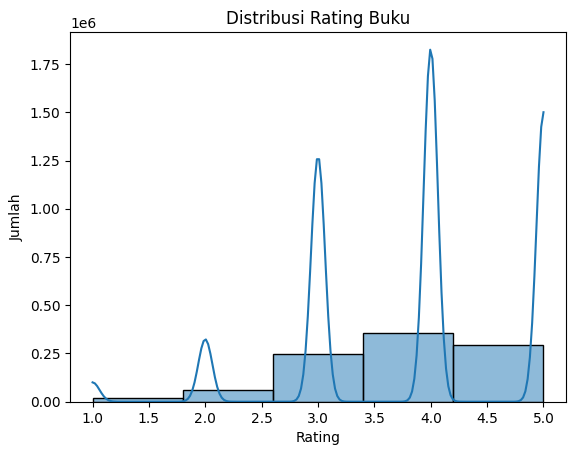

In [338]:
# Visualisasi distribusi rating buku
sns.histplot(ratings['rating'], bins=5, kde=True)
plt.title('Distribusi Rating Buku')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

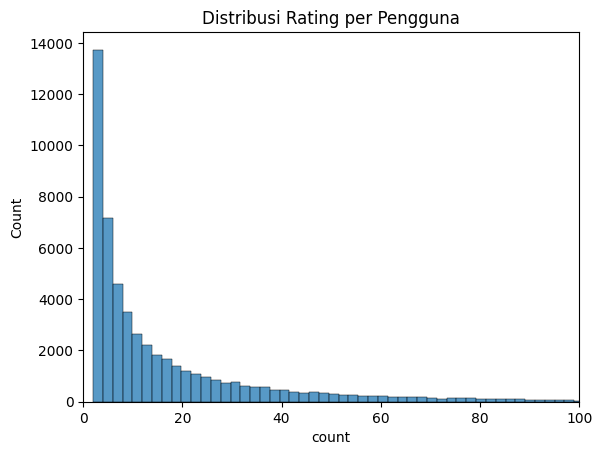

In [339]:
# Visualisasi distribusi jumlah rating per user
user_rating_counts = ratings['user_id'].value_counts()
sns.histplot(user_rating_counts, bins=100)
plt.title('Distribusi Rating per Pengguna')
plt.xlim(0, 100)  # Fokus pada pengguna dengan rating sampai 100 kali
plt.show()

In [341]:
# Mengatasi missing value pada dataset books
books.fillna({'language_code': books['language_code'].mode()[0]}, inplace=True)

# Data Preparation

Membaca dataset dari file CSV ke dalam DataFrame bernama *books.*

In [244]:
books = pd.read_csv('./goodbooks10k/books.csv')

Mengecek nama kolom dan beberapa data teratas untuk memahami struktur data.

In [245]:
print(books.columns)
print(books.head())

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')
   id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   
1   2        3             3  4640799          491  439554934  9.780440e+12   
2   3    41865         41865  3212258          226  316015849  9.780316e+12   
3   4     2657          2657  3275794          487   61120081  9.780061e+12   
4   5     4671          4671   245494         1356  743273567  9.780743e+12   

                       authors  original_publication_year  \
0              Suzanne Collins                     2008.0

Menyaring kolom-kolom penting saja dari dataset, lalu membuat salinan ke book_new agar data asli tidak berubah.

In [342]:
book_new = books[['book_id', 'title', 'authors', 'original_publication_year', 'average_rating', 'ratings_count']].copy()

Mengganti nama kolom menjadi lebih ringkas dan mudah digunakan.

In [343]:
book_new.columns = ['id', 'title', 'author', 'year', 'avg_rating', 'num_ratings']

Menampilkan 10 data awal dan 5 data acak untuk melihat distribusi dan isi data.

In [344]:
print(book_new.head(10))
print(book_new.sample(5))

         id                                              title  \
0   2767052            The Hunger Games (The Hunger Games, #1)   
1         3  Harry Potter and the Sorcerer's Stone (Harry P...   
2     41865                            Twilight (Twilight, #1)   
3      2657                              To Kill a Mockingbird   
4      4671                                   The Great Gatsby   
5  11870085                             The Fault in Our Stars   
6      5907                                         The Hobbit   
7      5107                             The Catcher in the Rye   
8       960              Angels & Demons  (Robert Langdon, #1)   
9      1885                                Pride and Prejudice   

                        author    year  avg_rating  num_ratings  
0              Suzanne Collins  2008.0        4.34      4780653  
1  J.K. Rowling, Mary GrandPré  1997.0        4.44      4602479  
2              Stephenie Meyer  2005.0        3.57      3866839  
3        

Mengecek nilai kosong (missing values) di setiap kolom


In [346]:
print(book_new.isnull().sum())

id              0
title           0
author          0
year           21
avg_rating      0
num_ratings     0
dtype: int64


Menangani nilai kosong pada kolom year dengan mengisinya menggunakan nilai median. Ini adalah pendekatan umum untuk data numerik yang kemungkinan skewed.

In [347]:
median_year = book_new['year'].median()
book_new['year'] = book_new['year'].fillna(median_year)

Mengecek ulang apakah masih ada nilai kosong setelah pengisian.

In [348]:
print(book_new.isnull().sum())

id             0
title          0
author         0
year           0
avg_rating     0
num_ratings    0
dtype: int64


# Model Development dengan Content Based Filtering

Menyiapkan dataset book_new dan menampilkan 5 sampel acak dari data untuk eksplorasi awal.

In [250]:
data = book_new
data.sample(5)

,id,title,author,year,avg_rating,num_ratings
4663,2251306,Brain Rules: 12 Principles for Surviving and T...,John Medina,2008.0,4.00,19172
4738,5989573,"Scott Pilgrim, Volume 5: Scott Pilgrim Vs. the...",Bryan Lee O'Malley,2009.0,4.33,24936
981,40024,"The Alienist (Dr. Laszlo Kreizler, #1)",Caleb Carr,1994.0,4.05,96981
1070,234184,"Stone of Tears (Sword of Truth, #2)",Terry Goodkind,1995.0,4.10,83235
9283,4800764,"Sweet Persuasion (Sweet, #2)",Maya Banks,2009.0,4.09,16437


* Membuat instance *TfidfVectorizer* untuk mengubah teks menjadi vektor numerik.

* *stop_words='english'* digunakan agar kata-kata umum dalam bahasa Inggris diabaikan (misalnya: "the", "and", dll).

* Melakukan **fit** dan **transform** pada kolom 'combined' yang merupakan gabungan dari judul dan nama penulis untuk menangkap konteks konten buku.

* Mengubah hasil TF-IDF menjadi DataFrame agar bisa divisualisasikan dan difilter.

* Memfilter hanya kolom dengan nilai TF-IDF lebih dari nol di setidaknya satu baris untuk mengurangi kolom yang tidak relevan.







In [252]:
# Buat TF-IDF Vectorizer dengan stop words bahasa Inggris
tfidf = TfidfVectorizer(stop_words='english')

# Fit dan transform data 'combined' (judul + author)
tfidf_matrix = tfidf.fit_transform(data['combined'])

# Buat DataFrame dari tfidf_matrix untuk visualisasi (optional)
tfidf_df = pd.DataFrame.sparse.from_spmatrix(
    tfidf_matrix,
    index=data['title'],
    columns=tfidf.get_feature_names_out()
)

# Filter kolom yang ada nilai TF-IDF > 0 minimal di satu baris (kata yang relevan)
tfidf_nonzero = tfidf_df.loc[:, (tfidf_df > 0).any()]

print(tfidf_nonzero.head())

                                                    000  01  02  03  04  05  \
title                                                                         
The Hunger Games (The Hunger Games, #1)               0   0   0   0   0   0   
Harry Potter and the Sorcerer's Stone (Harry Po...    0   0   0   0   0   0   
Twilight (Twilight, #1)                               0   0   0   0   0   0   
To Kill a Mockingbird                                 0   0   0   0   0   0   
The Great Gatsby                                      0   0   0   0   0   0   

                                                    06  07  08  09  ...  桜坂洋  \
title                                                               ...        
The Hunger Games (The Hunger Games, #1)              0   0   0   0  ...    0   
Harry Potter and the Sorcerer's Stone (Harry Po...   0   0   0   0  ...    0   
Twilight (Twilight, #1)                              0   0   0   0  ...    0   
To Kill a Mockingbird                         

* Mengukur seberapa mirip antar buku berdasarkan vektor TF-IDF dengan metode cosine similarity.

* Mengubah hasil cosine similarity menjadi DataFrame agar bisa dicari berdasarkan judul.


In [253]:
# Hitung cosine similarity matrix dari tfidf_matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Ubah menjadi DataFrame dengan index dan kolom berupa judul buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])

print(cosine_sim_df.sample(5).sample(5, axis=1))  # lihat sample similarity

title                                  The Perfect Husband (Quincy & Rainie, #1)  \
title                                                                              
Strange Angels (Strange Angels, #1)                                          0.0   
Someone to Love (Someone to Love, #1)                                        0.0   
War Horse (War Horse, #1)                                                    0.0   
The Love Dare                                                                0.0   
Wonderful Tonight                                                            0.0   

title                                  Elixir (Covenant, #3.5)  \
title                                                            
Strange Angels (Strange Angels, #1)                        0.0   
Someone to Love (Someone to Love, #1)                      0.0   
War Horse (War Horse, #1)                                  0.0   
The Love Dare                                              0.0   
Wonderful Tonig

Fungsi ini menerima title dan mengembalikan daftar buku paling mirip berdasarkan konten (judul + penulis) menggunakan nilai cosine similarity tertinggi.

In [254]:
def recommend_books(title, cosine_sim=cosine_sim_df, data=data, top_n=10):
    # Cek apakah buku ada di dataset
    if title not in cosine_sim.index:
        return f"Buku '{title}' tidak ditemukan dalam data."

    # Ambil skor similarity buku tersebut dengan buku lain
    sim_scores = cosine_sim[title]

    # Urutkan skor similarity secara menurun, kecuali dirinya sendiri (nilai max = 1)
    sim_scores = sim_scores.drop(title).sort_values(ascending=False)

    # Ambil top n buku yang paling mirip
    top_books = sim_scores.head(top_n).index

    # Ambil data buku tersebut
    recommended = data[data['title'].isin(top_books)][['title', 'author', 'year', 'avg_rating']]

    return recommended.reset_index(drop=True)

In [255]:
print(data['title'].head(20))

0               The Hunger Games (The Hunger Games, #1)
1     Harry Potter and the Sorcerer's Stone (Harry P...
2                               Twilight (Twilight, #1)
3                                 To Kill a Mockingbird
4                                      The Great Gatsby
5                                The Fault in Our Stars
6                                            The Hobbit
7                                The Catcher in the Rye
8                 Angels & Demons  (Robert Langdon, #1)
9                                   Pride and Prejudice
10                                      The Kite Runner
11                            Divergent (Divergent, #1)
12                                                 1984
13                                          Animal Farm
14                            The Diary of a Young Girl
15     The Girl with the Dragon Tattoo (Millennium, #1)
16                 Catching Fire (The Hunger Games, #2)
17    Harry Potter and the Prisoner of Azkaban (

Menampilkan 10 buku paling mirip dengan The Hunger Games berdasarkan konten.

In [256]:
print(recommend_books('The Hunger Games (The Hunger Games, #1)'))

                                               title            author  \
0               Catching Fire (The Hunger Games, #2)   Suzanne Collins   
1                  Mockingjay (The Hunger Games, #3)   Suzanne Collins   
2  The Hunger Games Trilogy Boxset (The Hunger Ga...   Suzanne Collins   
3  The Hunger Games: Official Illustrated Movie C...         Kate Egan   
4                     The Hunger Games Tribute Guide       Emily Seife   
5                                  Hunger (Gone, #2)    Michael  Grant   
6   A Hunger Like No Other (Immortals After Dark #2)      Kresley Cole   
7                    Nemesis Games (The Expanse, #5)  James S.A. Corey   
8                  The Quillan Games (Pendragon, #7)      D.J. MacHale   
9  The World of the Hunger Games (Hunger Games Tr...         Kate Egan   

     year  avg_rating  
0  2009.0        4.30  
1  2010.0        4.03  
2  2010.0        4.49  
3  2012.0        4.51  
4  2012.0        4.40  
5  2009.0        4.02  
6  2006.0        

#### Fungsi Generalisasi

* data: diasumsikan sebagai DataFrame utama yang berisi kolom title, author, avg_rating, dan year.

* cosine_sim_df: diasumsikan sebagai DataFrame berisi similarity scores antar buku (judul sebagai index & columns).

In [257]:
def get_recommendations(method, value, top_n=5):
    if method == 'title':
        book_title = value
        if book_title not in data['title'].values:
            print(f"Buku '{book_title}' tidak ditemukan dalam data.")
            return

        if book_title not in cosine_sim_df.index:
            print(f"Buku '{book_title}' tidak ditemukan di cosine_sim_df index.")
            return

        sim_scores = cosine_sim_df.loc[book_title]
        closest_titles = sim_scores.nlargest(top_n + 1).index.drop(book_title)
        recommendations = data[data['title'].isin(closest_titles)].head(top_n).reset_index(drop=True)

        print("Rekomendasi Berdasarkan Judul Buku:")
        for i, row in recommendations.iterrows():
            print(f"{i+1}. {row['title']} - {row['author']}")
        print()  # Memberi jarak antar output

    elif method == 'author':
        author_books = data[data['author'].str.contains(value, case=False, na=False)]
        if author_books.empty:
            print(f"Tidak ditemukan buku oleh penulis '{value}'.")
            return

        top_books = author_books.sort_values(by='avg_rating', ascending=False).head(top_n).reset_index(drop=True)
        print(f"Rekomendasi Buku oleh Penulis '{value}':")
        for i, row in top_books.iterrows():
            print(f"{i+1}. {row['title']} - {row['author']} (Rating: {row['avg_rating']})")
        print()  # Memberi jarak antar output

    elif method == 'year':
        year_books = data[data['year'] == value]
        if year_books.empty:
            print(f"Tidak ada buku ditemukan dari tahun {value}.")
            return

        top_books = year_books.sort_values(by='avg_rating', ascending=False).head(top_n).reset_index(drop=True)
        print(f"Rekomendasi Buku dari Tahun {value}:")
        for i, row in top_books.iterrows():
            print(f"{i+1}. {row['title']} - {row['author']} (Rating: {row['avg_rating']})")
        print()  # Memberi jarak antar output

    else:
        print("Metode tidak dikenal. Gunakan 'title', 'author', atau 'year'.")

In [258]:
# Rekomendasi berdasarkan judul
get_recommendations(method='title', value='The Hunger Games (The Hunger Games, #1)', top_n=5)

# Rekomendasi berdasarkan penulis
get_recommendations(method='author', value='Suzanne Collins', top_n=5)

# Rekomendasi berdasarkan tahun
get_recommendations(method='year', value=2008, top_n=5)

Rekomendasi Berdasarkan Judul Buku:
1. Catching Fire (The Hunger Games, #2) - Suzanne Collins
2. Mockingjay (The Hunger Games, #3) - Suzanne Collins
3. The Hunger Games Trilogy Boxset (The Hunger Games, #1-3) - Suzanne Collins
4. The Hunger Games Tribute Guide - Emily Seife
5. The World of the Hunger Games (Hunger Games Trilogy) - Kate Egan

Rekomendasi Buku oleh Penulis 'Suzanne Collins':
1. The Hunger Games Trilogy Boxset (The Hunger Games, #1-3) - Suzanne Collins (Rating: 4.49)
2. The Hunger Games (The Hunger Games, #1) - Suzanne Collins (Rating: 4.34)
3. Catching Fire (The Hunger Games, #2) - Suzanne Collins (Rating: 4.3)
4. Gregor and the Code of Claw (Underland Chronicles, #5) - Suzanne Collins (Rating: 4.25)
5. Gregor and the Marks of Secret (Underland Chronicles, #4) - Suzanne Collins (Rating: 4.21)

Rekomendasi Buku dari Tahun 2008:
1. Acheron (Dark-Hunter #14) - Sherrilyn Kenyon (Rating: 4.59)
2. Percy Jackson and the Olympians (Percy Jackson and the Olympians, #1-3) - Rick R

# Training

**1. Preprocessing Data**

* Mengubah user ID dan book ID ke bentuk numerik dengan LabelEncoder.

* Membuat target biner: rating 4 ke atas dianggap suka (1), di bawahnya tidak suka (0).

* Membagi data menjadi data latih dan data validasi dengan proporsi 80:20 dan stratifikasi label agar seimbang.

**2. Membangun Model Neural Network**

* Model menggunakan embedding layer untuk merepresentasikan user dan buku sebagai vektor berdimensi rendah (embedding).

* Menghitung interaksi (dot product) antara embedding user dan buku untuk memperkirakan preferensi.

* Menambahkan bias khusus user dan buku untuk meningkatkan akurasi prediksi.

* Menggunakan fungsi aktivasi sigmoid untuk menghasilkan output probabilitas suka atau tidak.

**3. Kompilasi dan Pelatihan Model**

* Model dikompilasi dengan loss function binary crossentropy karena targetnya berupa kelas biner.

* Optimizer Adam dengan learning rate kecil digunakan untuk training.

* Monitoring metrik seperti akurasi, AUC, dan RMSE selama pelatihan.

* Callback seperti early stopping dan reduce learning rate on plateau dipakai untuk menghindari overfitting dan meningkatkan performa.

**4. Evaluasi Model**

* Menggunakan data validasi untuk mengevaluasi hasil prediksi model.

* Menghasilkan confusion matrix dan classification report untuk melihat performa klasifikasi.

* Memvisualisasikan ROC curve untuk mengukur kemampuan model dalam membedakan kelas.



Epoch 1/40
3068/3068 ━━━━━━━━━━━━━━━━━━━━ 222s 71ms/step - accuracy: 0.4591 - auc: 0.5056 - loss: 0.6931 - rmse: 0.4999 - val_accuracy: 0.5555 - val_auc: 0.5443 - val_loss: 0.6904 - val_rmse: 0.4985 - learning_rate: 5.0000e-05
Epoch 2/40
3068/3068 ━━━━━━━━━━━━━━━━━━━━ 177s 58ms/step - accuracy: 0.5059 - auc: 0.5538 - loss: 0.6892 - rmse: 0.4979 - val_accuracy: 0.6061 - val_auc: 0.5892 - val_loss: 0.6871 - val_rmse: 0.4969 - learning_rate: 5.0000e-05
Epoch 3/40
3068/3068 ━━━━━━━━━━━━━━━━━━━━ 207s 59ms/step - accuracy: 0.5442 - auc: 0.5937 - loss: 0.6855 - rmse: 0.4961 - val_accuracy: 0.6450 - val_auc: 0.6277 - val_loss: 0.6838 - val_rmse: 0.4952 - learning_rate: 5.0000e-05
Epoch 4/40
3068/3068 ━━━━━━━━━━━━━━━━━━━━ 179s 58ms/step - accuracy: 0.5711 - auc: 0.6257 - loss: 0.6818 - rmse: 0.4942 - val_accuracy: 0.6697 - val_auc: 0.6587 - val_loss: 0.6805 - val_rmse: 0.4935 - learning_rate: 5.0000e-05
Epoch 5/40
3068/3068 ━━━━━━━━━━━━━━━━━━━━ 184s 60ms/step - accuracy: 0.5908 - auc: 0.6518 - 

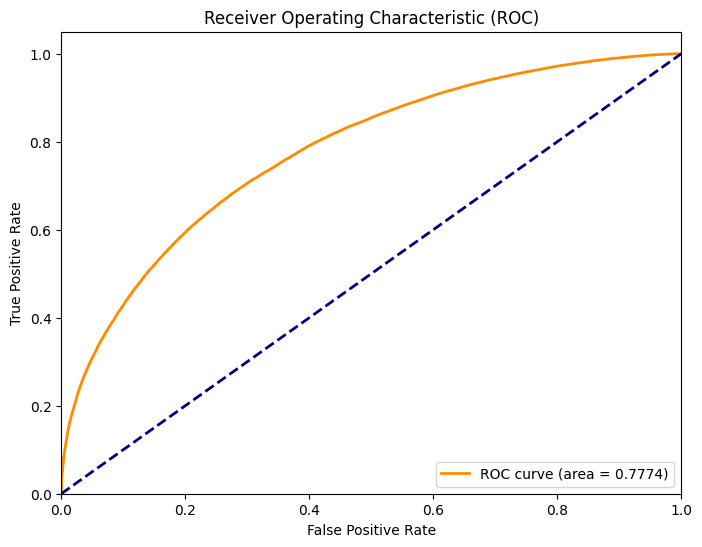

In [270]:
# === PREPROCESSING ===

# Label encoding untuk user dan book ID
user_enc = LabelEncoder()
book_enc = LabelEncoder()

ratings['user'] = user_enc.fit_transform(ratings['user_id'].values)
ratings['book'] = book_enc.fit_transform(ratings['book_id'].values)
ratings['rating'] = ratings['rating'].values.astype(np.float32)

# Membuat label biner: rating >= 4 dianggap suka (1), lainnya tidak suka (0)
x = ratings[['user', 'book']].values
y = ratings['rating'].apply(lambda r: 1 if r >= 4 else 0).values

# Split data menjadi training dan validation set dengan stratifikasi agar seimbang
x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# === MODEL DEFINITION ===

class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_books, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)

        # Embedding untuk user
        self.user_embedding = layers.Embedding(
            input_dim=num_users,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)

        # Embedding untuk book
        self.book_embedding = layers.Embedding(
            input_dim=num_books,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.book_bias = layers.Embedding(num_books, 1)

        # Dropout untuk regularisasi
        self.dropout = layers.Dropout(0.3)

    def call(self, inputs, training=False):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        book_bias = self.book_bias(inputs[:, 1])

        # Perhitungan skor interaksi dengan dot product dan bias
        dot_user_book = tf.reduce_sum(user_vector * book_vector, axis=1, keepdims=True)
        x = dot_user_book + user_bias + book_bias

        x = self.dropout(x, training=training)
        return tf.nn.sigmoid(x)

# Jumlah user dan buku unik
num_users = ratings['user'].nunique()
num_books = ratings['book'].nunique()

# Inisialisasi model
model = RecommenderNet(num_users, num_books, embedding_size=64)

# Kompilasi model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.00005),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.RootMeanSquaredError(name='rmse')
    ]
)

# Callback untuk early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc',
    patience=5,
    restore_best_weights=True
)

# Callback untuk mengurangi learning rate saat performa stagnan
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_auc',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1,
    mode='max'
)

# === TRAINING ===

history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=256,
    epochs=40,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)

# === EVALUATION ===

# Prediksi probabilitas
y_val_pred_prob = model.predict(x_val).flatten()

# Konversi ke label biner dengan threshold default 0.5
threshold = 0.5
y_val_pred = (y_val_pred_prob >= threshold).astype(int)

# Tampilkan confusion matrix dan classification report
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### Menyimpan Model dan Encoder

* Model TensorFlow disimpan ke file recommender_model.h5 supaya bisa digunakan ulang tanpa training ulang.

* Encoder user dan book yang dipakai untuk mengubah ID asli menjadi indeks numerik juga disimpan menggunakan pickle.

* Penting untuk menyimpan encoder supaya saat rekomendasi bisa mengonversi ID user atau buku secara konsisten.

In [274]:
# Simpan model
model.save("recommender_model.h5")

# Simpan encoder
import pickle

with open("user_encoder.pkl", "wb") as f:
    pickle.dump(user_enc, f)
with open("book_encoder.pkl", "wb") as f:
    pickle.dump(book_enc, f)

#### Fungsi Rekomendasi dengan Judul dan Penulis Buku

Fungsi ini merekomendasikan buku untuk user berdasarkan user_id input. Fungsi mengecek keberadaan user dalam data, lalu memprediksi skor kecocokan semua buku dengan user tersebut menggunakan model yang sudah dilatih. Fungsi mengembalikan dan menampilkan daftar buku terbaik (top N) berdasarkan skor prediksi, lengkap dengan judul dan penulisnya.

In [312]:
def recommend_books_with_titles(user_id_input, top_n=5):
    """
    Rekomendasi buku berdasarkan user_id.
    Mengembalikan DataFrame buku rekomendasi top_n dengan judul dan penulis.
    """
    user_id = np.int64(user_id_input)

    # Cek apakah user ada dalam data pelatihan
    if user_id not in user_enc.classes_:
        print(f"User ID '{user_id}' tidak ditemukan dalam data pelatihan.")
        return None

    # Encode user_id
    encoded_user_id = user_enc.transform([user_id])[0]

    # Semua indeks buku dari 0 sampai num_books-1
    book_indices = np.arange(num_books)

    # Buat array user dengan nilai encoded_user_id sebanyak buku
    user_array = np.full_like(book_indices, fill_value=encoded_user_id)

    # Gabungkan user dan book indices jadi input untuk model
    inputs = np.vstack((user_array, book_indices)).T

    # Prediksi skor kecocokan buku untuk user
    predictions = model.predict(inputs).flatten()

    # Ambil indeks buku dengan skor tertinggi
    top_indices = predictions.argsort()[::-1][:top_n]

    # Mapping indeks buku ke ID asli buku di data
    book_id_index_to_id = data['id'].sort_values().values
    recommended_book_real_ids = book_id_index_to_id[top_indices]

    print("recommended_book_real_ids:", recommended_book_real_ids)

    # Cek ID buku yang tidak ditemukan dalam data (seharusnya kosong)
    missing_ids = [bid for bid in recommended_book_real_ids if bid not in data['id'].values]
    if missing_ids:
        print("Book IDs tidak ditemukan di data:", missing_ids)

    # Filter yang valid (ada dalam data)
    valid_book_ids = [bid for bid in recommended_book_real_ids if bid in data['id'].values]

    if len(valid_book_ids) < top_n:
        print(f"Warning: hanya {len(valid_book_ids)} buku ditemukan dari rekomendasi top-{top_n}")

    # Ambil data buku berdasarkan ID valid, urut sesuai urutan rekomendasi
    recommended_books = data[data['id'].isin(valid_book_ids)]
    recommended_books = recommended_books.set_index('id').loc[valid_book_ids].reset_index()

    # Tampilkan hasil rekomendasi
    print(f"Rekomendasi Top-{len(valid_book_ids)} untuk User {user_id}:")
    for i, row in recommended_books.iterrows():
        print(f"{i+1}. {row['title']} - {row['author']}")

    return recommended_books[['id', 'title', 'author']]

Fungsi menghasilkan daftar 5 buku yang direkomendasikan untuk user dengan ID 1, lengkap dengan judul dan nama penulisnya. Prediksi model menampilkan buku dengan skor kecocokan tertinggi sebagai rekomendasi teratas.

In [313]:
# Contoh pemanggilan fungsi
recommended_books = recommend_books_with_titles(1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
recommended_book_real_ids: [  347656 22698568   801178  6907672    16298]
Rekomendasi Top-5 untuk User 1:
1. Don't Waste Your Life - John Piper
2. The Invasion of the Tearling (The Queen of the Tearling, #2) - Erika Johansen
3. Chicken Soup for the Soul - Jack Canfield, Mark Victor Hansen
4. The Talisman (Volume 1): The Road of Trials - Robin Furth, Stephen King, Peter Straub, Tony Shasteen, Nei Ruffino
5. A Murder Is Announced (Miss Marple, #5) - Agatha Christie
